<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 97.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 137.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 84.6 MB/s eta 0:00:00


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [20]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [42]:
import numpy


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
df.columns


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

In [4]:
df.dtypes


ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [21]:
df.isna().sum()
#Check the number of missing values per column

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

In [22]:
df.isna().sum().sum()
#View overall count of missing values

np.int64(2890957)

In [23]:
df_clean_all = df.dropna(how='all')
#Drop rows where all values are missing

In [24]:
df.isna().sum().sum()
#View overall count of missing values

np.int64(2890957)

In [25]:
# 2. Impute numeric columns with median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# 3. Impute categorical with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# 4. Drop any remaining missing data (if needed)
df.dropna(inplace=True)

/tmp/ipykernel_300/2075738611.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipykernel_300/2075738611.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [26]:
df.isna().sum().sum()
#View overall count of missing values

np.int64(0)

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [27]:
# Count of unique values for Employment
employment_counts = df['Employment'].value_counts(dropna=False)
print("Employment Value Counts:\n", employment_counts)

# Count of unique values for JobSat
jobsat_counts = df['JobSat'].value_counts(dropna=False)
print("\nJob Satisfaction Value Counts:\n", jobsat_counts)

# Count of unique values for YearsCodePro
years_code_pro_counts = df['YearsCodePro'].value_counts(dropna=False)
print("\nProfessional Coding Experience Value Counts:\n", years_code_pro_counts)

#value_counts() shows how many times each unique response appears.
#Using dropna=False includes missing values (NaN) so you can see which responses are missing or unanswered.

Employment Value Counts:
 Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking f

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


In [28]:
# Count the JobSat responses
job_sat_counts = df['JobSat'].value_counts(dropna=True)

# Sort so the pie chart is more readable (optional)
job_sat_counts = job_sat_counts.sort_values(ascending=False)
#Prepare Data for Plotting

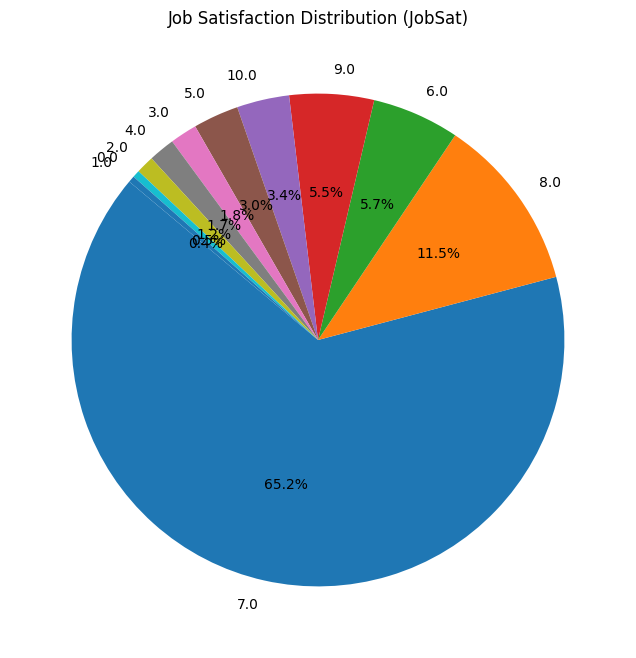

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
job_sat_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Job Satisfaction Distribution (JobSat)')
plt.ylabel('')  # Hide default y-label
plt.show()
#Pie Chart of Job Satisfaction
#A pie chart is great for categorical distribution—it shows how each category contributes to the whole.

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [30]:
# Split semi-colon separated languages into lists
worked = df['LanguageHaveWorkedWith'].dropna().str.split(';')
want = df['LanguageWantToWorkWith'].dropna().str.split(';')

# Explode into separate rows then count
worked_counts = worked.explode().value_counts()
want_counts = want.explode().value_counts()

# Combine the two into a DataFrame for comparison
lang_compare = pd.DataFrame({
    'WorkedWith': worked_counts,
    'WantToWorkWith': want_counts
}).fillna(0)  # fill missing with 0

#Prepare the Language Data
#In the Stack Overflow survey dataset, the columns like LanguageHaveWorkedWith and LanguageWantToWorkWith often contain multiple languages separated by semicolons for each respondent. To analyze them correctly, you need to:
#Split each string of languages into individual entries
#Count frequency of each language in both lists

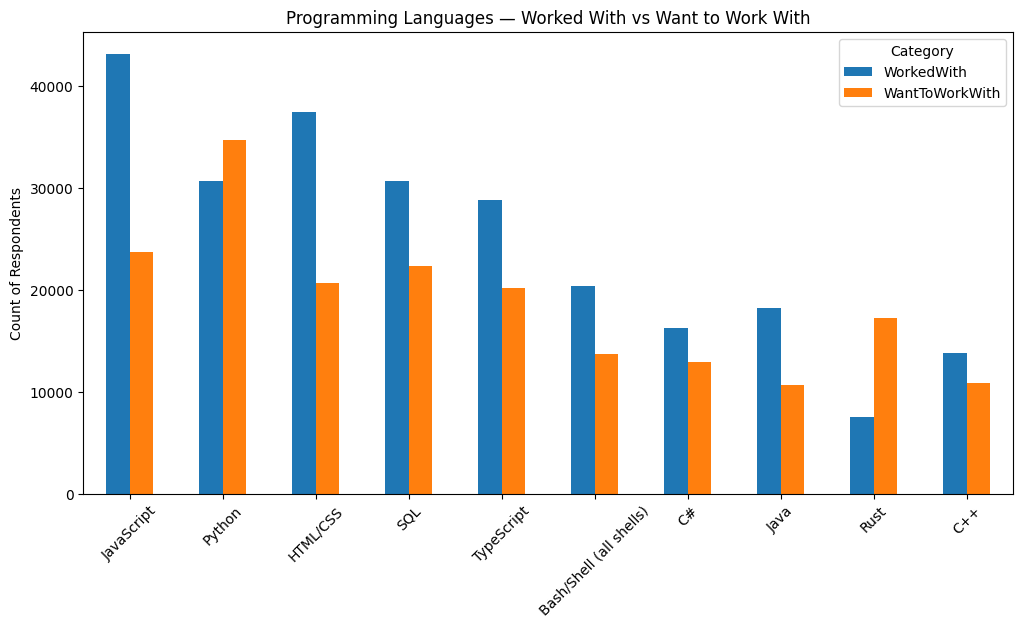

In [31]:
import matplotlib.pyplot as plt

# Choose top languages to plot (for readability)
top_langs = lang_compare.sum(axis=1).sort_values(ascending=False).head(10).index
filtered = lang_compare.loc[top_langs]

# Plot grouped bars
filtered.plot(kind='bar', figsize=(12,6))
plt.title('Programming Languages — Worked With vs Want to Work With')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

#Grouped Bar Chart
#This is the best choice when you want to compare counts directly across two sets.

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


In [34]:
# Count RemoteWork categories by region
remote_by_region = df.groupby(['Country', 'RemoteWork']).size().unstack(fill_value=0)

# Optionally normalize to show percentages instead of absolute counts
remote_by_region_pct = remote_by_region.div(remote_by_region.sum(axis=1), axis=0) * 100


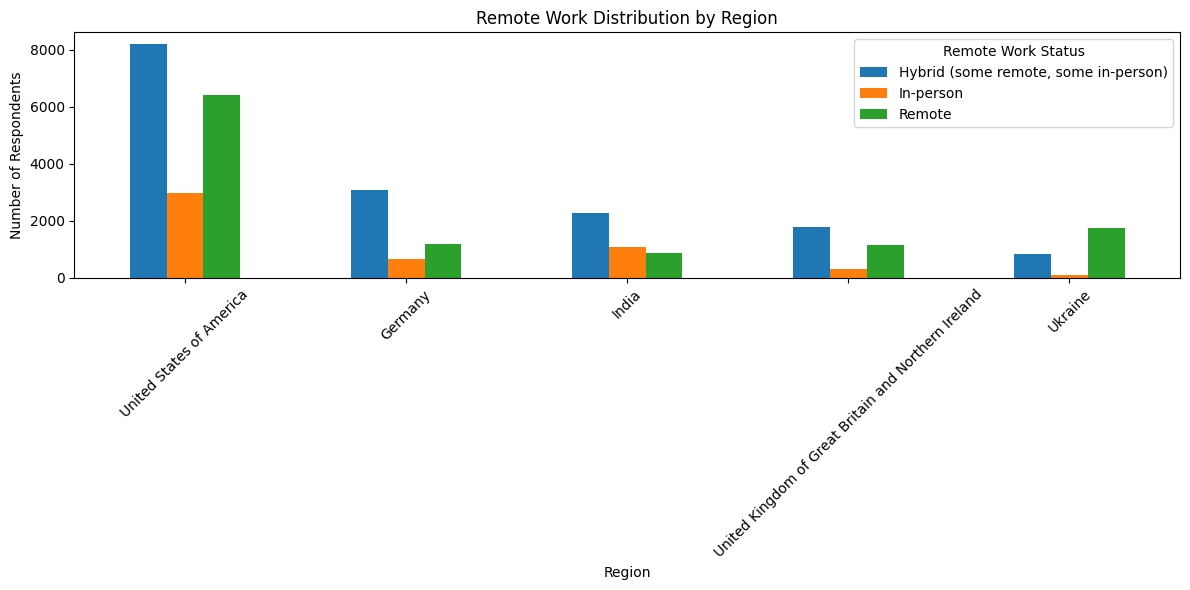

In [35]:
import matplotlib.pyplot as plt

# Choose top regions for readability (e.g., top 5 by number of respondents)
top_regions = df['Country'].value_counts().head(5).index
filtered = remote_by_region.loc[top_regions]

# Plot
filtered.plot(kind='bar', figsize=(12,6))
plt.title('Remote Work Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Remote Work Status')
plt.tight_layout()
plt.show()
#Grouped Bar Chart (RemoteWork by Region)

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [ ]:
#To analyze the correlation between overall job satisfaction (JobSat) and professional coding experience (YearsCodePro) in your Stack Overflow survey dataset, you’ll follow these steps:
#Convert categorical data to numeric
#The variables JobSat and YearsCodePro are usually stored as text labels (like “Very satisfied” or “5 to 9 years”), so we first need to map them to numeric codes.

In [46]:
# Example mapping for JobSat
job_sat_mapping = {
    "Very satisfied": 5,
    "Somewhat satisfied": 4,
    "Neither satisfied nor dissatisfied": 3,
    "Somewhat dissatisfied": 2,
    "Very dissatisfied": 1,
    "NA": numpy.nan  # handle non-answers
}


# Example mapping for YearsCodePro — ordered scale
years_code_mapping = {
    "Less than 1 year": 0.5,
    "1 to 4 years": 2.5,
    "5 to 9 years": 7,
    "10 to 14 years": 12,
    "15 to 19 years": 17,
    "20 to 24 years": 22,
    "25 to 29 years": 27,
    "30 to 34 years": 32,
    "35 to 39 years": 37,
    "40 to 44 years": 42,
    "45 to 49 years": 47,
    "More than 50 years": 55
}

# Apply the transformation
df['JobSat_num'] = df['JobSat'].map(job_sat_mapping)
df['YearsCodePro_num'] = df['YearsCodePro'].map(years_code_mapping)


In [47]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


In [49]:
from scipy.stats import spearmanr
clean_df = df[['JobSat_num', 'YearsCodePro_num']].dropna()

print("Rows used for correlation:", len(clean_df))

spearman_corr = clean_df['JobSat_num'].corr(clean_df['YearsCodePro_num'], method='spearman')
print("Spearman correlation:", spearman_corr)


Rows used for correlation: 0
Spearman correlation: nan


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [51]:
# Cross-tabulation of Employment vs Education Level
employment_education_ct = pd.crosstab(df['EdLevel'], df['Employment'])

# Display the first few rows
employment_education_ct.head()

# Create a Cross-Tabulation
# This table lets you see, for example:
# How many people with a Bachelor’s degree are employed full-time
# How many with a Master’s are part-time, etc

Employment,"Employed, full-time","Employed, full-time;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed","Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Retired","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time",...,"Student, full-time;Not employed, but looking for work;Not employed, and not looking for work;Student, part-time","Student, full-time;Not employed, but looking for work;Retired","Student, full-time;Not employed, but looking for work;Student, part-time","Student, full-time;Retired","Student, full-time;Student, part-time","Student, full-time;Student, part-time;Employed, part-time","Student, full-time;Student, part-time;Retired","Student, part-time","Student, part-time;Employed, part-time","Student, part-time;Retired"
EdLevel,,,,,,,,,,,,,,,,,,,,,
"Associate degree (A.A., A.S., etc.)",1059,9,104,11,0,0,0,0,0,5,...,0,0,0,0,2,0,0,12,24,0
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",19322,106,1592,95,0,0,1,0,0,58,...,1,0,5,1,18,1,0,171,223,0
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11011,61,963,45,0,1,0,0,0,26,...,0,1,0,0,2,1,0,26,85,2
Primary/elementary school,160,1,25,1,0,1,0,1,0,0,...,0,0,0,0,5,1,1,48,4,0
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",2073,8,159,10,1,0,0,0,0,1,...,0,0,0,0,0,0,0,5,5,0


/tmp/ipykernel_300/2842586508.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


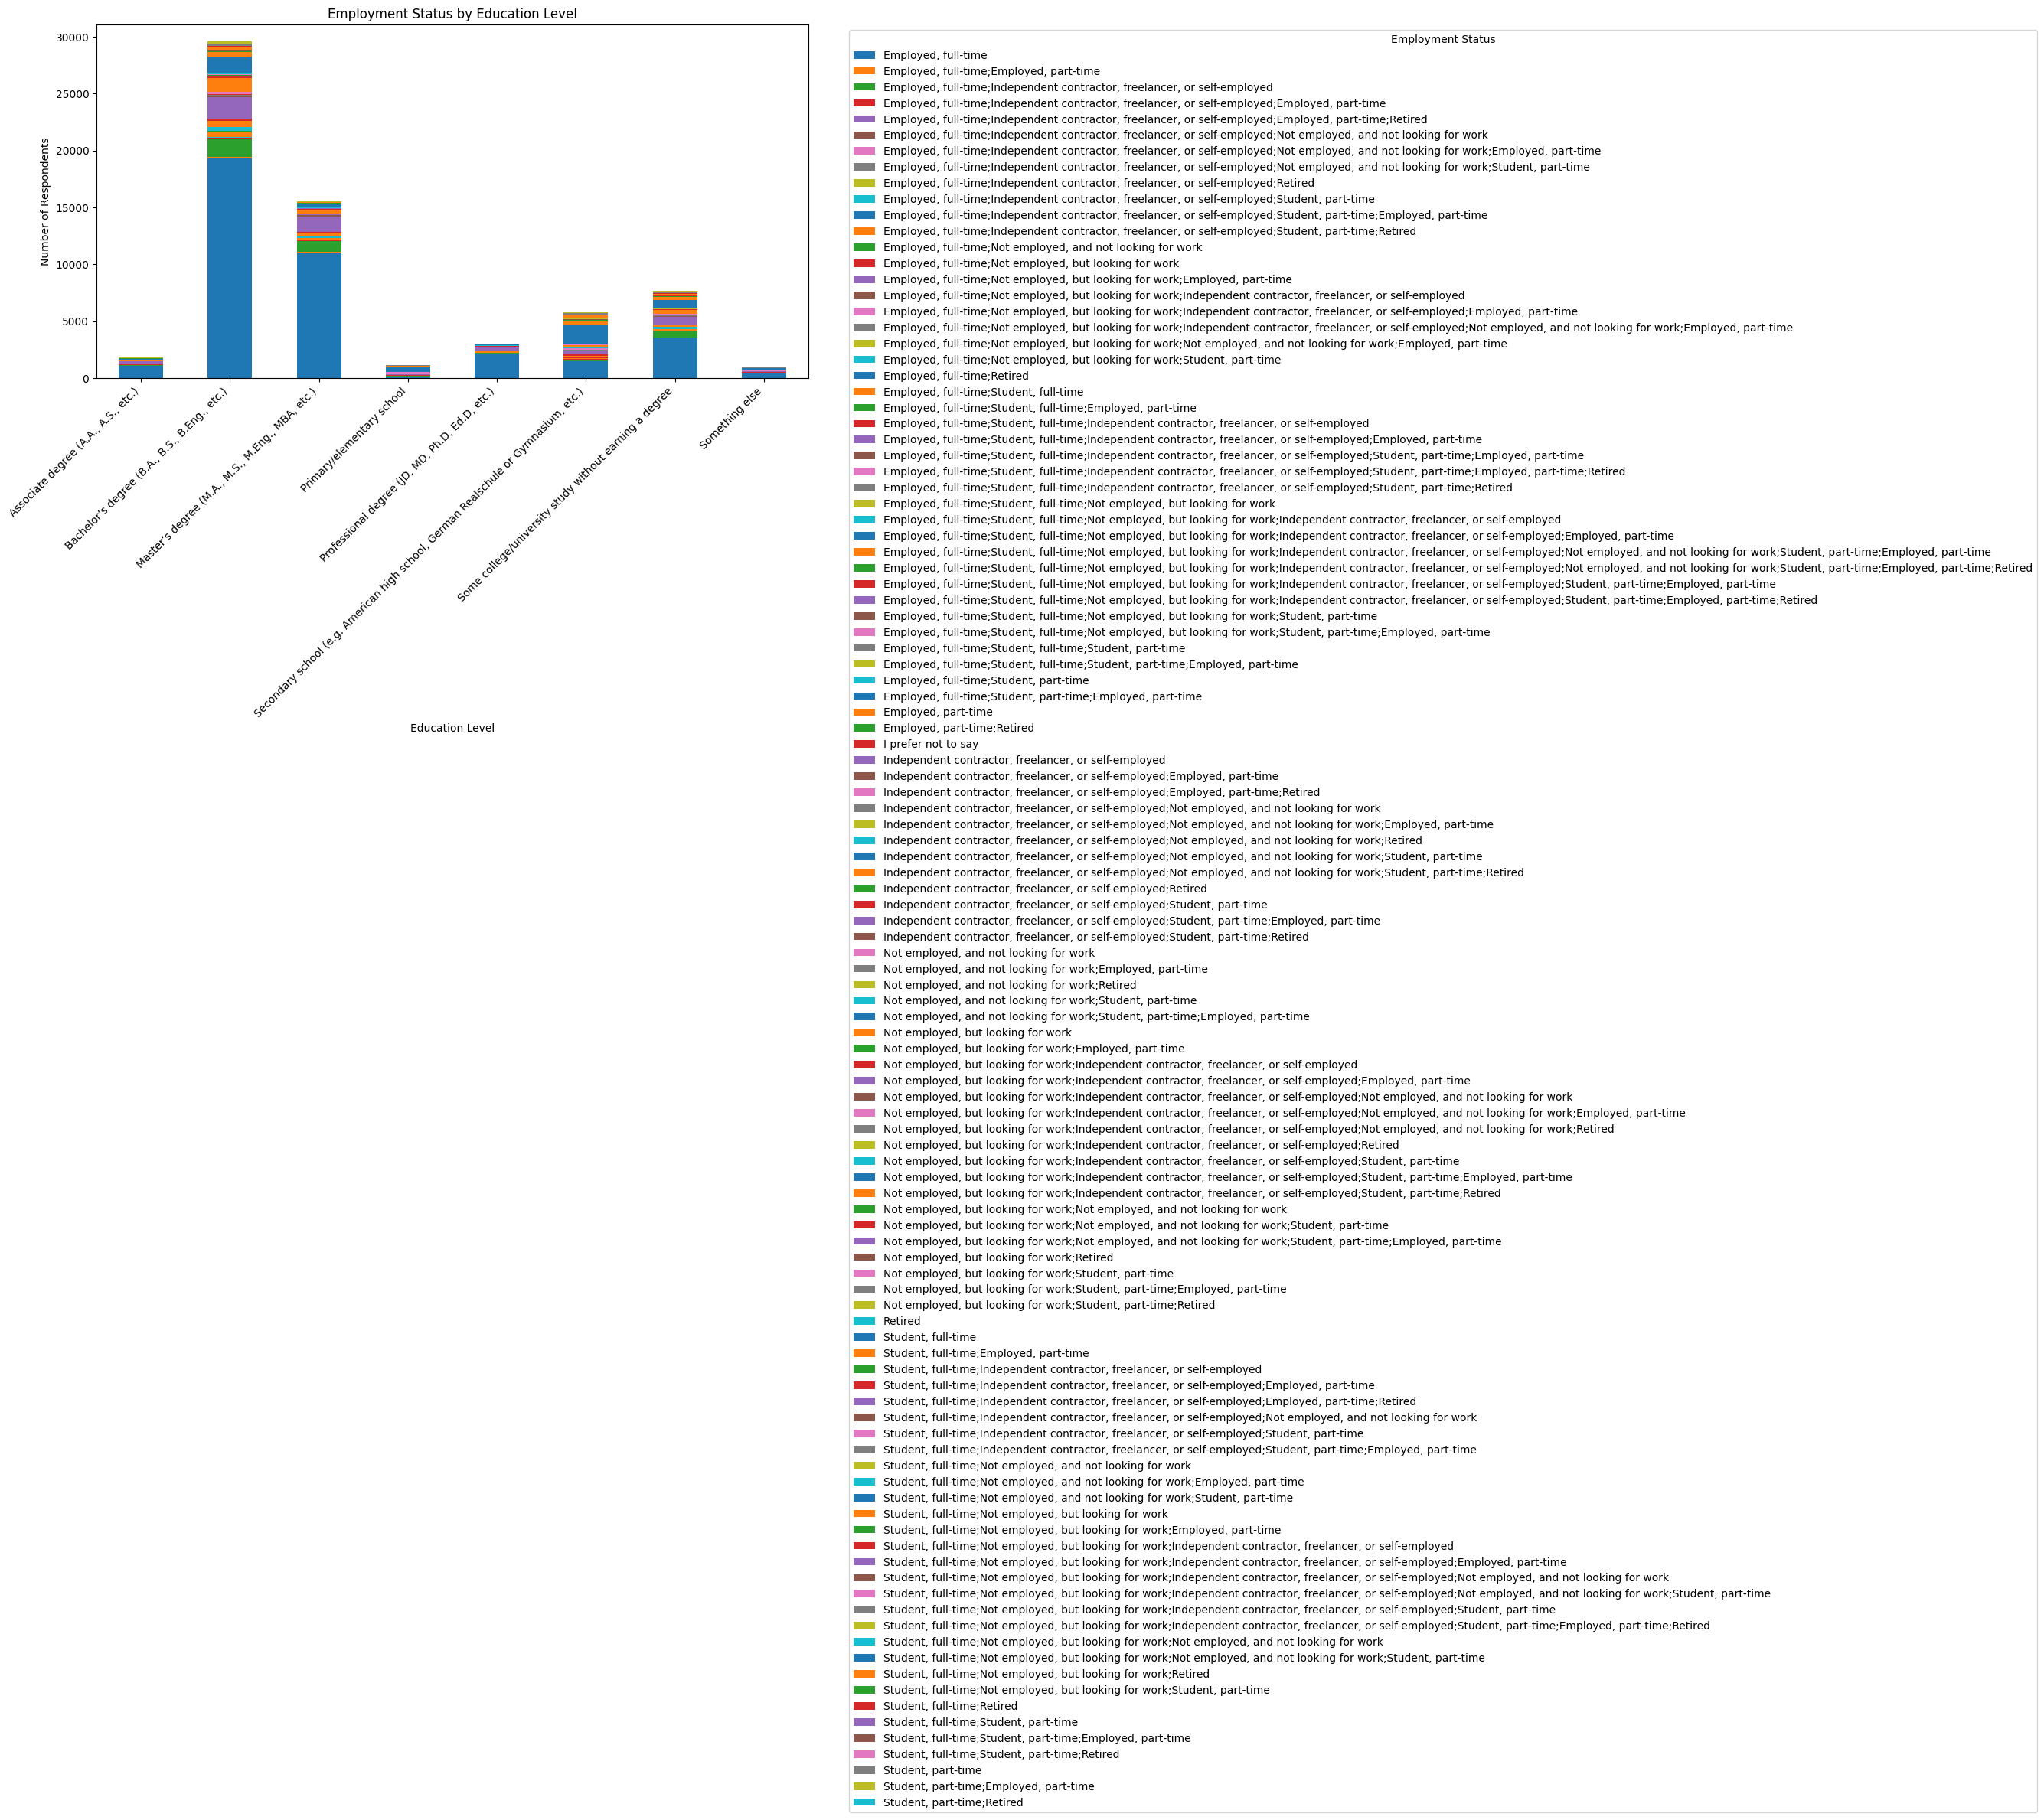

In [52]:
import matplotlib.pyplot as plt

# Plot as stacked bars
employment_education_ct.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6)
)

plt.title('Employment Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize with a Stacked Bar Chart
# A stacked bar chart helps you compare education categories across employment statuses

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [53]:
# Save the cleaned dataset to a CSV
df.to_csv("cleaned_survey_data.csv", index=False)


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
